In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import subprocess
plt.close('all')

In [2]:
basepath = os.path.abspath('')
buildpath = os.path.abspath(f'{basepath}/../../build/tests/experiment/scripts')
columns = {'bookID':'int', 'isbn':'str', 'title':'str'}
experiments = ['insert']
trees = ['BST', 'AVL', 'RB']

In [15]:
def plot(experiments, files, trees, y, division=1, trendline=False, titles=None, y_label=None):
    for experiment in experiments:
        for f in files:
            csv = pd.read_csv(f'{basepath}/logs/{experiment}-{f}.csv')

            print(csv['BST elapsed time'].max())
            
            _, ax1 = plt.subplots()
            (csv[[z for z in csv.columns if y in z]] / division).plot(ax=ax1,
                                                                  title=f if titles is None or f not in titles else titles[f],
                                                                  ylabel=None if y_label is None or f not in y_label else y_label[f],
                                                                  xlabel='Number of elements')
            ax1.legend(trees)
            
            if trendline:
                _, ax2 = plt.subplots() 
                for data in csv[[z for z in csv.columns if y in z]]:
                    (csv[data] / division).plot(style='k',ax=ax2)
                for tree in trees:
                    csv[tree] = sm.OLS(csv[[z for z in csv.columns if tree in z and y in z]], csv.index).fit().fittedvalues
                    (csv[tree] / division).plot(ax=ax2,
                                                title=f'{f} trendline' if titles == None or f not in titles else f'{titles[f]} trendline',
                                                ylabel=None if y_label is None or f not in y_label else y_label[f], 
                                                legend=True,
                                                xlabel='Number of elements')

In [17]:
for x in columns.items():
    with open(f'{basepath}/data/{x[0]}.txt', 'w') as f:
        f.writelines(f'{x[1]}\n' + pd.read_csv('books.csv', on_bad_lines='skip')[x[0]].astype(str) + '\n')
        f.write('out\n')

In [24]:
for x in experiments:
    for y in columns:
        with open(f'{basepath}/data/{y}.txt') as stdin:
            with open(f'{basepath}/logs/{x}-{y}.csv', 'w') as stdout:
                subprocess.run(f'{buildpath}/experiment_{x}', text=True, stdin=stdin, stdout=stdout)

0.000378
0.000332
0.000327


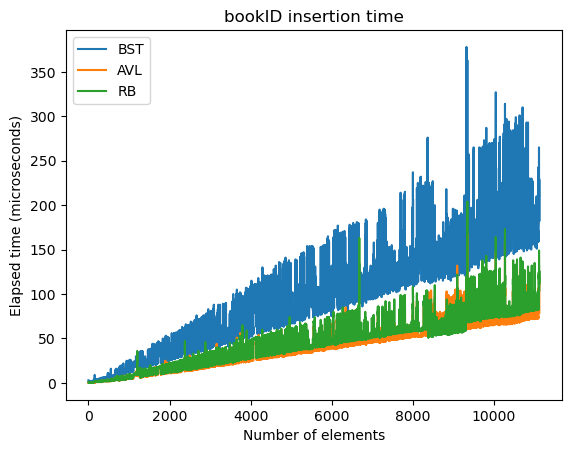

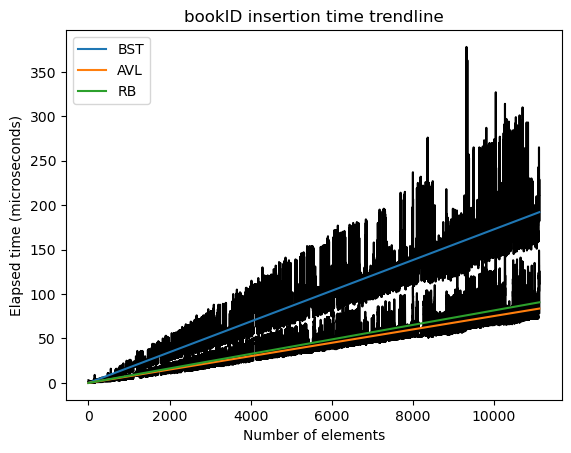

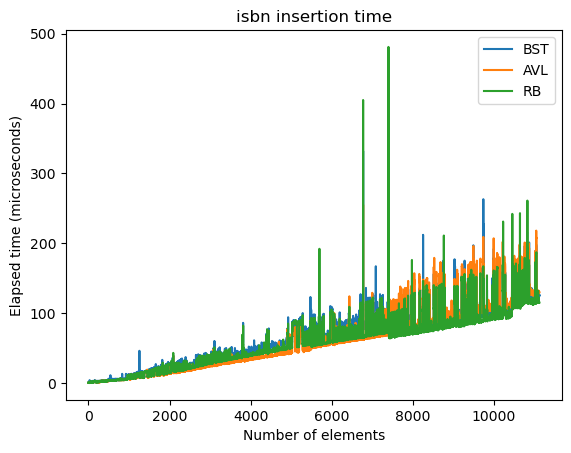

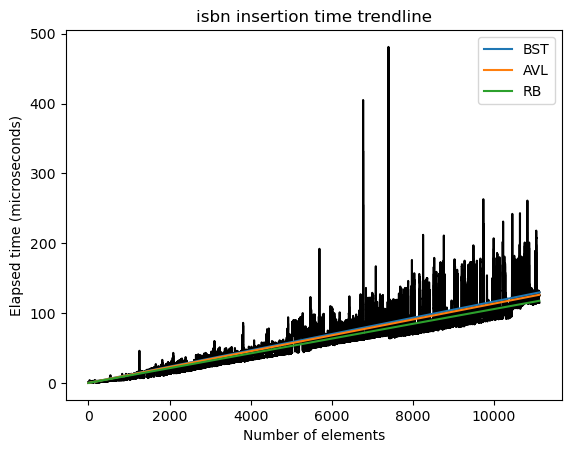

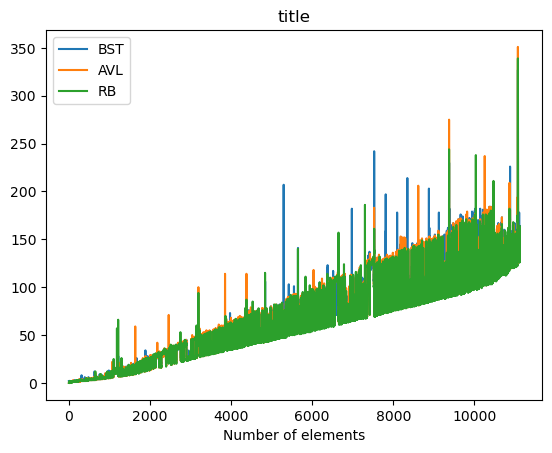

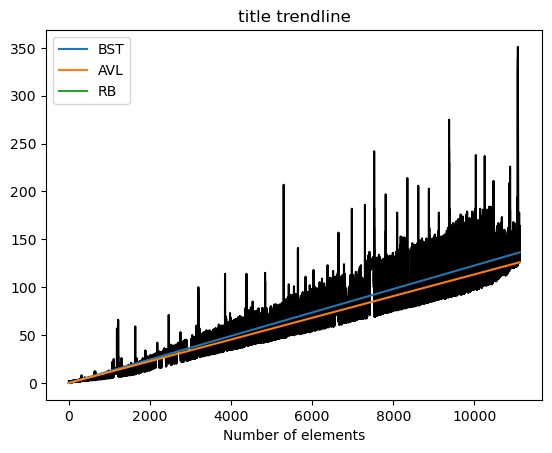

In [25]:
plot(experiments=experiments, 
     files=columns, 
     trees=trees, 
     y='time', 
     trendline=True, 
     titles={'bookID': 'bookID insertion time', 'isbn': 'isbn insertion time', 'authors': 'authors insertion time'},
     y_label={'bookID': 'Elapsed time (microseconds)', 'isbn': 'Elapsed time (microseconds)', 'authors': 'Elapsed time (microseconds)'},
     division=.000001)

0.000378
0.000332
0.000327


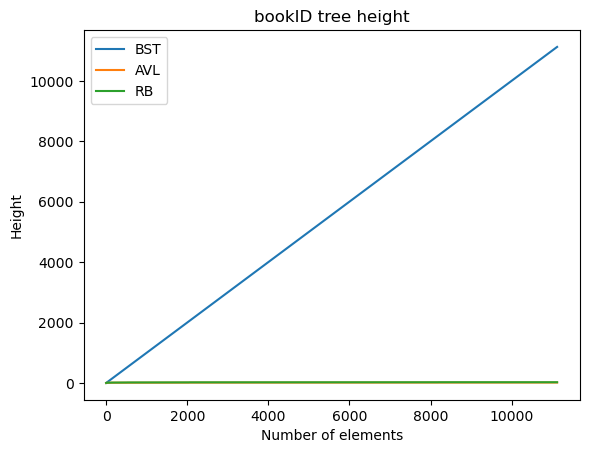

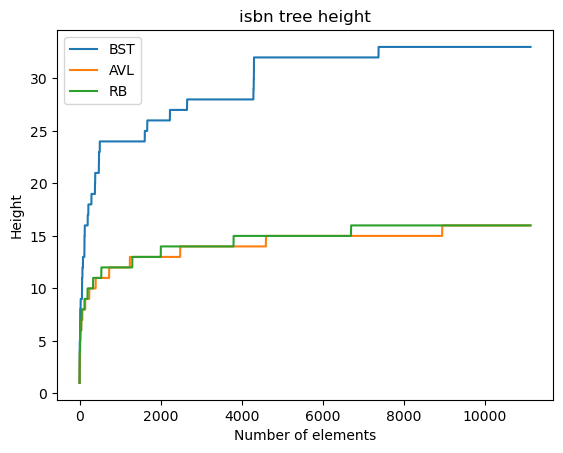

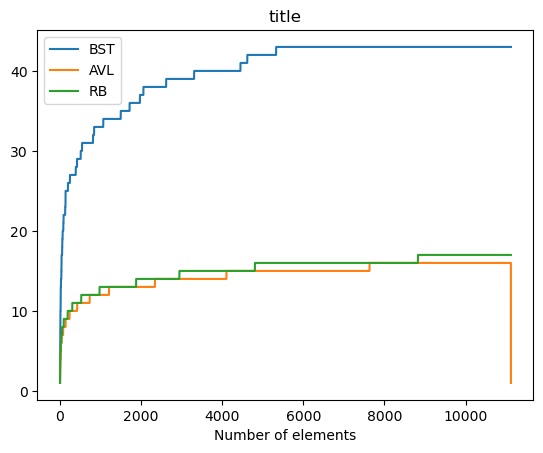

In [26]:
plot(experiments=experiments,
     files=columns, 
     trees=trees, 
     y='height',
     y_label={'bookID': 'Height', 'isbn': 'Height', 'authors': 'Height'},
     titles={'bookID': 'bookID tree height', 'isbn': 'isbn tree height', 'authors': 'authors tree height'})